### Identifying missing values in a tabular data

In [31]:
import pandas as pd
from io import StringIO

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

csv_data = \
'''
A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,
'''
df = pd.read_csv(StringIO(csv_data))
df

#to check the missing values in each columns
df.isnull().sum()

# You can always access the underlying numpy array
# by using the values attribute, As scikit-learn api
# sometimes accepts the numpy array as input
df.values

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


A    0
B    0
C    1
D    1
dtype: int64

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Eliminating training examples or features with missing values


In [12]:
# drop the rows with missing values
df.dropna(axis=0) #axis 0 for index, 1 for columns

# drop columns that have atlest one NaN in any row
df.dropna(axis=1)

# only drops rows where all columns are NaN
df.dropna(how='all')

# drop rows that have fewer than 3 real values
df.dropna(thresh=3)

# Only drop rows where NaN appears in specific columns
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0


,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


### Imputing missing values

In [32]:
from sklearn.impute import SimpleImputer
import numpy as np

# mean imputation, replace missing values with mean of feature
# other parameter for strategu are median, most_frequent
# most_frequent useful for imputing categorical variable

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

# alternative method in pandas
df.fillna(df.mean())

# KNN Imputer based on k-nearest neighbors approach to missing values

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


### Handling Categorical data


In [33]:
# Ordincal features - they have order or can be sorted
# Nominal features - no order
import pandas as pd
df = pd.DataFrame([
    ['Red', 'M', 11.5, 'class1'],
    ['Blue', 'L', 13.5, 'class2'],
    ['Green', 'XL', 15.5, 'class1']
])
df.columns = ['color', 'size', 'price', 'classlabel']
df

# Mapping ordinal features manually
size_mapping = {
    'XL':3,
    'L':2,
    'M':1}

df['size'] = df['size'].map(size_mapping)
df

# define a inverse mapping dictionary
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

,color,size,price,classlabel
0,Red,M,11.5,class1
1,Blue,L,13.5,class2
2,Green,XL,15.5,class1


,color,size,price,classlabel
0,Red,1,11.5,class1
1,Blue,2,13.5,class2
2,Green,3,15.5,class1


0     M
1     L
2    XL
Name: size, dtype: object

### Encoding class labels



In [34]:
# the labels of the class in number.
# The class labels are not ordinal, it does not matter
# which integer number we asisgn to particular string
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

# mapping dictionary to transform the class labels
df['classlabel'] = df['classlabel'].map(class_mapping)
df

# inverse mapping, the reverse of key-value pairs
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df




{'class1': 0, 'class2': 1}

,color,size,price,classlabel
0,Red,1,11.5,0
1,Blue,2,13.5,1
2,Green,3,15.5,0


,color,size,price,classlabel
0,Red,1,11.5,class1
1,Blue,2,13.5,class2
2,Green,3,15.5,class1


In [36]:
from sklearn.preprocessing import LabelEncoder
# alternatively there is LabelEncoder implement in scikit-learn to achieve this
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

# can call inverse transfrom method to tranform the integer class labels
class_le.inverse_transform(y)

array([0, 1, 0])

array(['class1', 'class2', 'class1'], dtype=object)

### Performing one-hot encoding on nominal features

In [38]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

# Here we could make the msot common mistake
# in dealing with catgeorical data. 
# It is now assumed that green is larger than blues
# To use One-Hot Encoding. To create a new dummy feature for each unique 
# value in the nominal feature column

# blue can - blue=1, green=0, red=0
from sklearn.preprocessing import OneHotEncoder
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[2, 1, 11.5],
       [0, 2, 13.5],
       [1, 3, 15.5]], dtype=object)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [44]:
# If we want to selectively tranform columns in a multi-feature array
# Use of ColumnTranformer. accepts a list (name, tranformer, columns(s))
from sklearn.compose import ColumnTransformer

c_tranf = ColumnTransformer([
    ('ohehot', OneHotEncoder(), [0]),
    ('nothing', 'passthrough', [1, 2]) #passthrough 
])
c_tranf.fit_transform(X).astype(float)

array([[ 0. ,  0. ,  1. ,  1. , 11.5],
       [ 1. ,  0. ,  0. ,  2. , 13.5],
       [ 0. ,  1. ,  0. ,  3. , 15.5]])

In [46]:
pd.get_dummies(df[['price', 'color', 'size']])
# to avoid multicollinearity, as highly correlated matrix are 
# computationally difficult to invert

# to reduce correlation among variables, we remove one feature column
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_Blue,color_Green,color_Red
0,11.5,1,False,False,True
1,13.5,2,True,False,False
2,15.5,3,False,True,False


,price,size,color_Green,color_Red
0,11.5,1,False,True
1,13.5,2,False,False
2,15.5,3,True,False


In [47]:
# to drop redudant column via OneHotEncoder
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])
c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  1. , 11.5],
       [ 0. ,  0. ,  2. , 13.5],
       [ 1. ,  0. ,  3. , 15.5]])

### Partitioning a dataset into separate training and test datasets


In [50]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
 'Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print('class labels', df_wine['Class label'].unique())
print('class labels', np.unique(df_wine['Class label']))
df_wine.head()

class labels [1 2 3]
class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [64]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

# test size = 30% of examples to test
# class label array 'y' as argument to stratify, esnures that
# both training and test data have same proportion of class label as orginal dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Bringing features onto the same scale


In [66]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [68]:
ex = np.array([0, 1, 2, 3, 4, 5])

# With mean a 0 and STD as 1. We center feature columns to 0 mean and unit variance
# so that feature column has same parameters as SND, which makes easier to learn weights
# Maintain useful information about outliers, 
print('Standardized : ', (ex - ex.mean()) / (ex.std()))

# scales the data to range [0, 1]. This is special case of MinMaxScaling
print('Normalized : ', (ex - ex.min())/ (ex.min() - ex.max()))


Standardized :  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalized :  [-0.  -0.2 -0.4 -0.6 -0.8 -1. ]


In [69]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# we fit the standard scaler class only once on training dataset
# learn the parameters  to transform the test dataset

### Selecting Meaningful features - L1 & L2


In [74]:
from sklearn.linear_model import LogisticRegression

# C = 1.0 is default values, you can increase it to see the impact of regularisation
# We can increase or decrese it to make the reg effect strong or weak
lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

print('Training Accuracy : ', lr.score(X_train_std, y_train))
print('Test Accuracy : ', lr.score(X_test_std, y_test))

lr.intercept_
# first intercept belongs to model that fits class 1 versus class 2 and 3
# second intercept belongs to model that fits class 2 versus class 1 and 3
# third intercept belongs to model that fits class 3 versus class 2 and 1

lr.coef_
# Contains three rows for each class with 13 columns for each feature
# one weight vector for each class


/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

Training Accuracy :  1.0
Test Accuracy :  0.9814814814814815


array([-1.38378813, -0.944792  , -2.34846959])

array([[ 1.42642328,  0.14047938,  0.70949885, -1.26070978,  0.        ,
         0.        ,  1.38334688,  0.        , -0.05640727,  0.        ,
         0.        ,  0.43427546,  1.97971999],
       [-1.46290467, -0.43947827, -1.21254195,  0.61684564,  0.        ,
         0.        ,  0.        ,  0.        ,  0.64876679, -1.70500044,
         1.22799222,  0.        , -1.98037878],
       [ 0.        ,  0.3976068 ,  0.32789971,  0.        ,  0.        ,
         0.        , -2.25632678,  0.        , -0.06969503,  1.71381173,
        -1.08937583, -0.15569868,  0.        ]])

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(0.0001), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(0.001), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(0.01), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(0.1), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(1.0), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(10.0), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(100.0), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(1000.0), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(10000.0), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

/Users/monusingh/work-share/code-practice-courses-books/machine-learning-python/.venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=np.float64(100000.0), multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

(1e-05, 100000.0)

Text(0, 0.5, 'weight coeffiecient')

Text(0.5, 0, 'C (inverse regularization strength)')

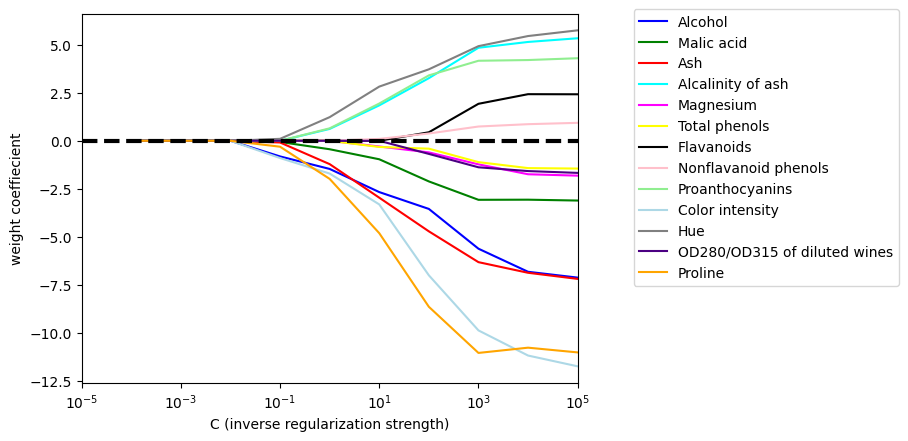

In [80]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black',
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear',
                             multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1],
             color = color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coeffiecient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()